In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import tensorflow as tf

In [2]:
# Requirement 1
def linearRegression_train(x_data, y_data):
    pass
    # Random initial guesses for parameters
    w = np.random.rand()
    b = np.random.rand()
    alpha = 0.001

    # print( f"w = {w}, b = {b}")

    for i in range(50000):
        dLoss_dw = np.mean(-2 * x_data * (y_data - (w * x_data + b)))
        w += -alpha * dLoss_dw

        dLoss_db = np.mean(-2 * (y_data - (w * x_data + b)))
        b += - alpha * dLoss_db

    w = round(w, 5)
    b = round(b, 5)

    coefficents = (b, w)
    print( f"w = {w}, b = {b}")
    return coefficents

def model_predict(coefficents, x_data):
    pass
    b, w = coefficents
    y_predicted = w*x_data + b

    return y_predicted


In [3]:
# Requirement 2
def analytical_sol(x_data, y_data):

    N = x_data.size
    sum_x = np.sum(x_data)
    sum_y = np.sum(y_data)
    sum_x2= np.sum(x_data**2)
    sum_xy = np.sum(x_data*y_data)

    Matrix_1 = np.array([[N, sum_x],
                        [sum_x, sum_x2]])

    Matrix_1_inv = np.linalg.inv(Matrix_1)

    Matrix_2 = np.array([ [sum_y],[sum_xy] ])

    coef = np.dot(Matrix_1_inv, Matrix_2)
    
    coef = np.ravel(coef)
    b , w = coef
    w = round(w, 5)
    b = round(b, 5)
    print( f"w = {w}, b = {b}")
    # print(coef)

    return coef

In [4]:
# Requirement 4:
def sklearn_train(x_data, y_data):
    x_data = x_data[:, np.newaxis]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_data, y_data)

    w = regr.coef_[0]
    b = regr.intercept_
    coeff = (b , w)

    # return the model
    return regr


def sklearn_predict(model, x_data):
    x_data = x_data[:, np.newaxis]
    predictions = model.predict(x_data)
    return predictions

In [5]:
# Generate the training data (𝑋, 𝑌) of size 𝑁.

# Define the number of points
num_points = 10000

# Generate random numbers between 0 and 2*pi for x_data
x_data = np.random.uniform(0, np.pi, num_points)

# Calculate the sine of x_data to get y_data
y_data = 2*x_data + 5
# y_data = np.sin(x_data) + 5

# Generate random noise
noise = np.random.normal(0, 0.5, num_points)  # Adjust the mean and standard deviation as needed

# Add noise to y_data
y_data = y_data + noise
# y_data = y_data


In [6]:
# Requirement 1 Test:

LR_model = linearRegression_train(x_data , y_data)

LR_prediction = model_predict(LR_model, x_data)

w = 1.99252, b = 5.0111


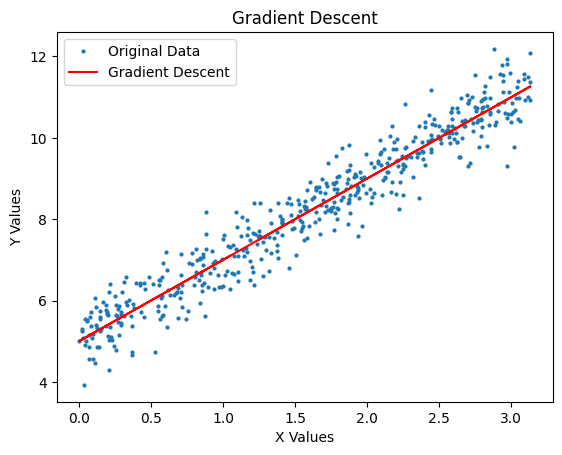

In [8]:
# Plot the original data points and the polynomial regression curve
points = 500
plt.plot(x_data[:points], y_data[:points], '.', label='Original Data', markersize=4)
plt.plot(x_data[:points], LR_prediction[:points], color='red', label='Gradient Descent', linewidth=1.5)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title("Gradient Descent")
plt.legend()
plt.show()

In [9]:
# Requriement 2 Test:

A_model = analytical_sol(x_data, y_data)

A_prediction = model_predict(A_model, x_data)

w = 1.99252, b = 5.0111


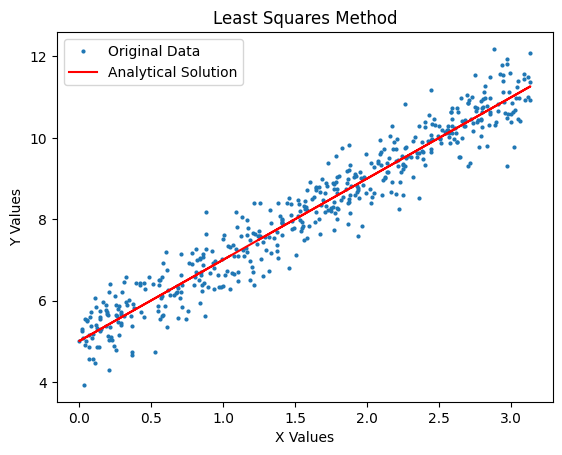

In [11]:
# Plot the original data points and the polynomial regression curve
points = 500
plt.plot(x_data[:points], y_data[:points], '.', label='Original Data', markersize=4)
plt.plot(x_data[:points], A_prediction[:points], color='red', label='Analytical Solution', linewidth=1.5)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title("Least Squares Method")
plt.legend()
plt.show()

[0. 0.]


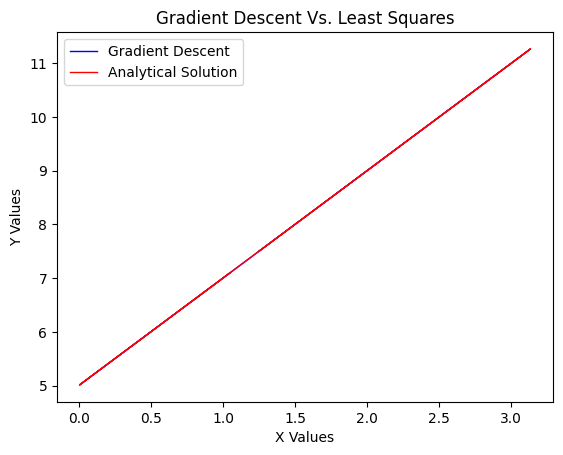

In [13]:
# Requirement 3: Compare Linear Regression to A_solution

model_difference = LR_model - A_model
model_difference = np.round(model_difference, 5)
print(model_difference)

# Plot the original data points and the polynomial regression curve
points = 500
plt.plot(x_data[:points], LR_prediction[:points], 'b', label='Gradient Descent', linewidth=1)
plt.plot(x_data[:points], A_prediction[:points], 'r', label='Analytical Solution', linewidth=1)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title("Gradient Descent Vs. Least Squares")
plt.legend()
plt.show()

In [14]:
# Requirement 4: Plot
SK_model = sklearn_train(x_data, y_data)

sklearn_prediction = sklearn_predict(SK_model, x_data)

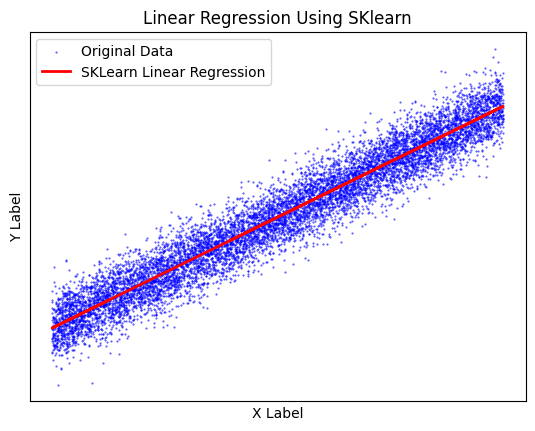

In [15]:
# Plot outputs
plt.scatter(x_data, y_data, color="blue", label="Original Data", s=1, marker=".", alpha=0.7)

plt.plot(x_data, sklearn_prediction, color="red", linewidth=2, label="SKLearn Linear Regression")

plt.xticks(())
plt.yticks(())

# Add legend
plt.legend()

# Add title
plt.title("Linear Regression Using SKlearn")

# Add labels
plt.xlabel("X Label")
plt.ylabel("Y Label")

# Add grid
plt.grid(True)

plt.show()

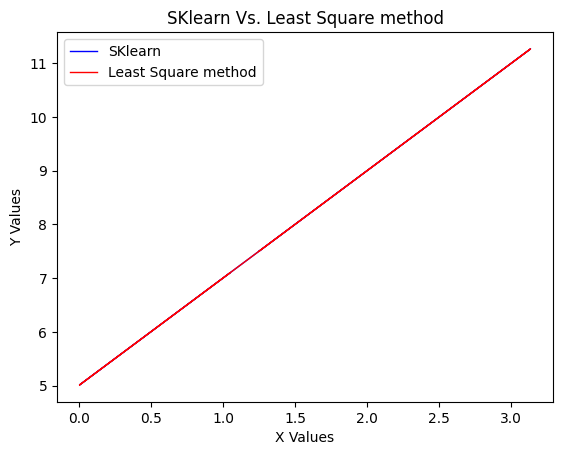

In [16]:
# Requirement 5: Compare Least Square method with SKLearn Linear Regression

points = 500
plt.plot(x_data[:points], sklearn_prediction[:points], 'b', label='SKlearn', linewidth=1)
plt.plot(x_data[:points], A_prediction[:points], 'r', label='Least Square method', linewidth=1)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title("SKlearn Vs. Least Square method")
plt.legend()
plt.show()

In [17]:
# Requriement 6: Neural Network

# Define the model
NN_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# Compile the model
NN_model.compile(optimizer='Adam', loss='mean_squared_error')

# Print the model summary
NN_model.summary()


C:\Users\msaee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Reshape the input data to match the model's input shape
x_train = np.copy(x_data)
y_train = np.copy(y_data)

x_train = x_train.reshape(-1, 1)  # Reshape to a 2D array with one column

# Train the model
NN_model.fit(x_train, y_train, epochs=200, batch_size = 64)

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 125.3853 
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 118.0005
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 106.8726
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 100.3115
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 91.9434
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 84.3073
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 77.8374
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - loss: 71.4656
Epoch 9/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 65.1993
Epoch 10/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 59.3690
Epoch 11/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 53.7300
Epoch 12/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 49.0558
Epoch 13/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 43.9841
Epoch 14/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 40.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step


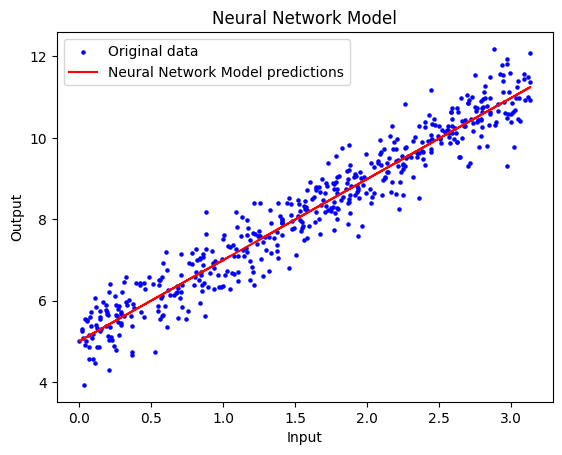

In [20]:
# Generate model predictions for the input data
NN_predition = NN_model.predict(x_train)
points = 500
# Plot the original data
plt.scatter(x_train[:points], y_train[:points], color='blue', label='Original data', s=5)

# Plot the model predictions
plt.plot(x_train[:points], NN_predition[:points], color='red', label='Neural Network Model predictions')

# Add labels and legend
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Neural Network Model')
plt.legend()

# Show the plot
plt.show()

In [21]:
# NN weight and bias
for layer in NN_model.layers:
    weight, bias = layer.get_weights()
    weight = weight[0][0]
    bias = bias[0]
    NN_coeff = (bias , weight)
    print("Layer Weights:", weight)
    print("Layer Biases:", bias)

Layer Weights: 1.9885875
Layer Biases: 5.0074472


[-0.00365 -0.00393]


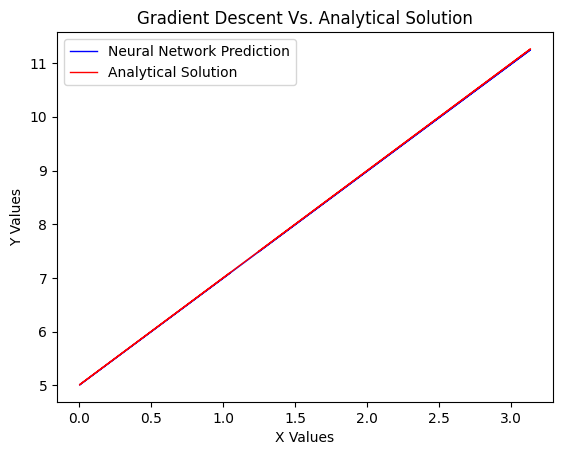

In [22]:
# Requirement 7: Compare NN to Least Square method
model_difference = NN_coeff - A_model
model_difference = np.round(model_difference, 5)
print(model_difference)

# Plot the original data points and the polynomial regression curve
points = 500
plt.plot(x_data[:points], NN_predition[:points], 'b', label='Neural Network Prediction', linewidth=1)
plt.plot(x_data[:points], A_prediction[:points], 'r', label='Analytical Solution', linewidth=1)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title("Neural Network Vs. Least Squares Solution")
plt.legend()
plt.show()